### Loading the Data 

In [13]:
#loading important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#reading the dataset
train = pd.read_csv('AirPassengers.csv')

#preprocessing
train.timestamp = pd.to_datetime(train.Month , format = '%Y-%m')
train.index = train.timestamp
train.drop('Month',axis = 1, inplace = True)

#looking at the first few rows
train.head()

C:\Users\vidya\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # This is added back by InteractiveShellApp.init_path()


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Methods to Check Stationarity 

#### Visual test

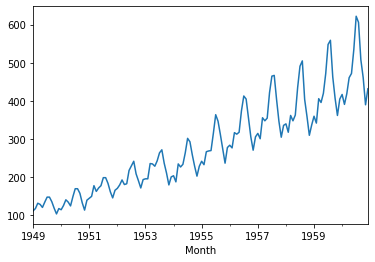

In [5]:
train['#Passengers'].plot()
plt.show()

#### ADF (Augmented Dickey Fuller) Test

In [3]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(train['#Passengers'])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


#### KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test 

In [9]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
        
kpss_test(train['#Passengers'])        

Results of KPSS Test:
Test Statistic            1.052175
p-value                   0.010000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\vidya\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1707: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


### Making a Time Series Stationary

 

#### Differencing 

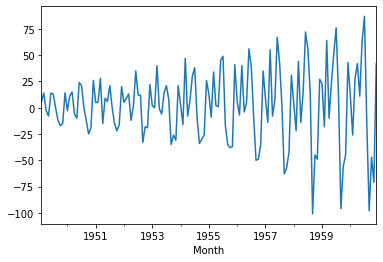

In [10]:
train['#Passengers_diff'] = train['#Passengers'] - train['#Passengers'].shift(1)
train['#Passengers_diff'].dropna().plot()

#### Seasonal Differencing 

In [11]:
n=7
train['#Passengers_diff'] = train['#Passengers'] - train['#Passengers'].shift(n)

#### Transformation 

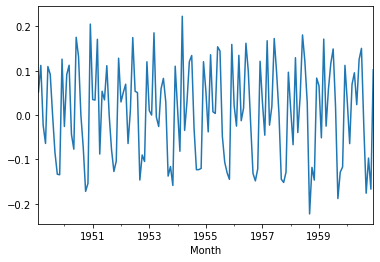

In [14]:
train['#Passengers_log'] = np.log(train['#Passengers'])
train['#Passengers_log_diff'] = train['#Passengers_log'] - train['#Passengers_log'].shift(1)
train['#Passengers_log_diff'].dropna().plot()